In [1]:
!python -m pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 28.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.8 MB/s eta 0:00:00a 0:00:01


In [3]:
import os
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib as mpl

In [456]:
! ls ../Exps/GAN_PI

GAN_PI_1			   GAN_PI_LL_s20_r5
GAN_PI_G_w100_LL_s5		   GAN_PI_LL_s30
GAN_PI_G_w200_LL_s5		   GAN_PI_LL_s5_lr4
GAN_PI_Gl5_Dl6			   GAN_PI_LL_s5_r5
GAN_PI_Gl6_Dl5			   GAN_PI_enforce_supervised
GAN_PI_LL_s10			   GAN_PI_higher_stochastic
GAN_PI_LL_s10_PDELL		   GAN_PI_l5
GAN_PI_LL_s10_PDELL_D_os_2_G_os_2  GAN_PI_low_stochastic
GAN_PI_LL_s10_PDELL_D_os_3_G_os_5  GAN_PI_red
GAN_PI_LL_s10_PDELL_D_os_5_G_os_3  GAN_PI_w_1
GAN_PI_LL_s10_d10_PDELL		   GAN_PI_w_2
GAN_PI_LL_s10_d5_PDELL		   GAN_PI_w_l3
GAN_PI_LL_s20


# Unary experiments

In [20]:
root="../Exps/GAN_PI"
#root="../Exps/Data_sensibility_exps/GAN_PI"

In [21]:
#model_id="GAN_PI_LL_s10_PDELL_D_os_3_G_os_5"
#model_id="GAN_PI_PointNet_LL_s10_PDELL"
#model_id="GAN_PI_PointNet_LL_PDELL_G_PointN_D_MLP"
#model_id="GAN_PI_PointNet_LL_PDELL_D1_G1"
model_id="GAN_PI_PointNet_LL_r10_PDELL"
model_id="GAN_PI__MultiP20_PointNet_LL_PDELL"
hist=np.load(os.path.join(root,model_id,"loss_results.npy"),allow_pickle=True)
hist=hist.tolist()

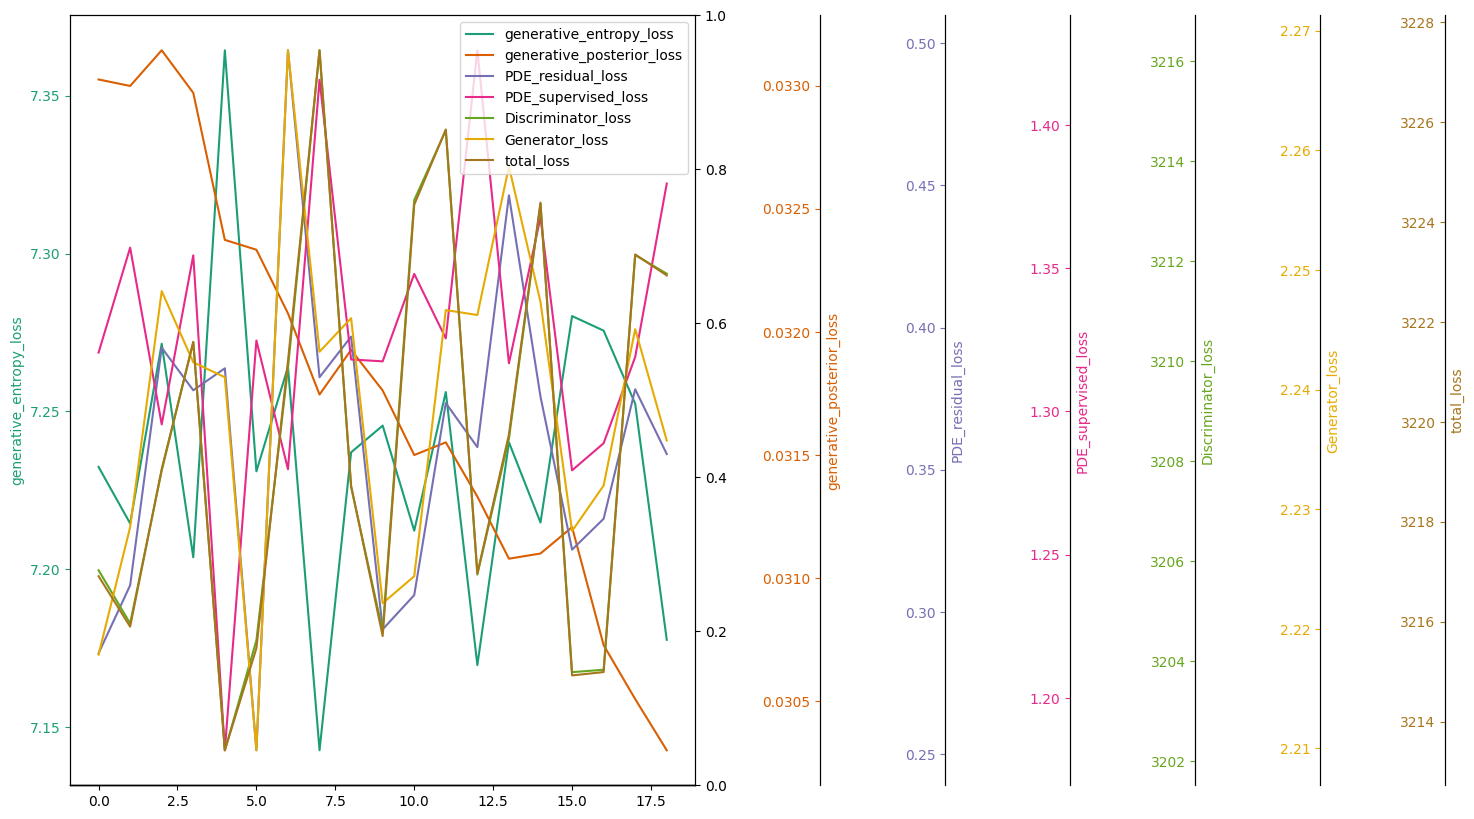

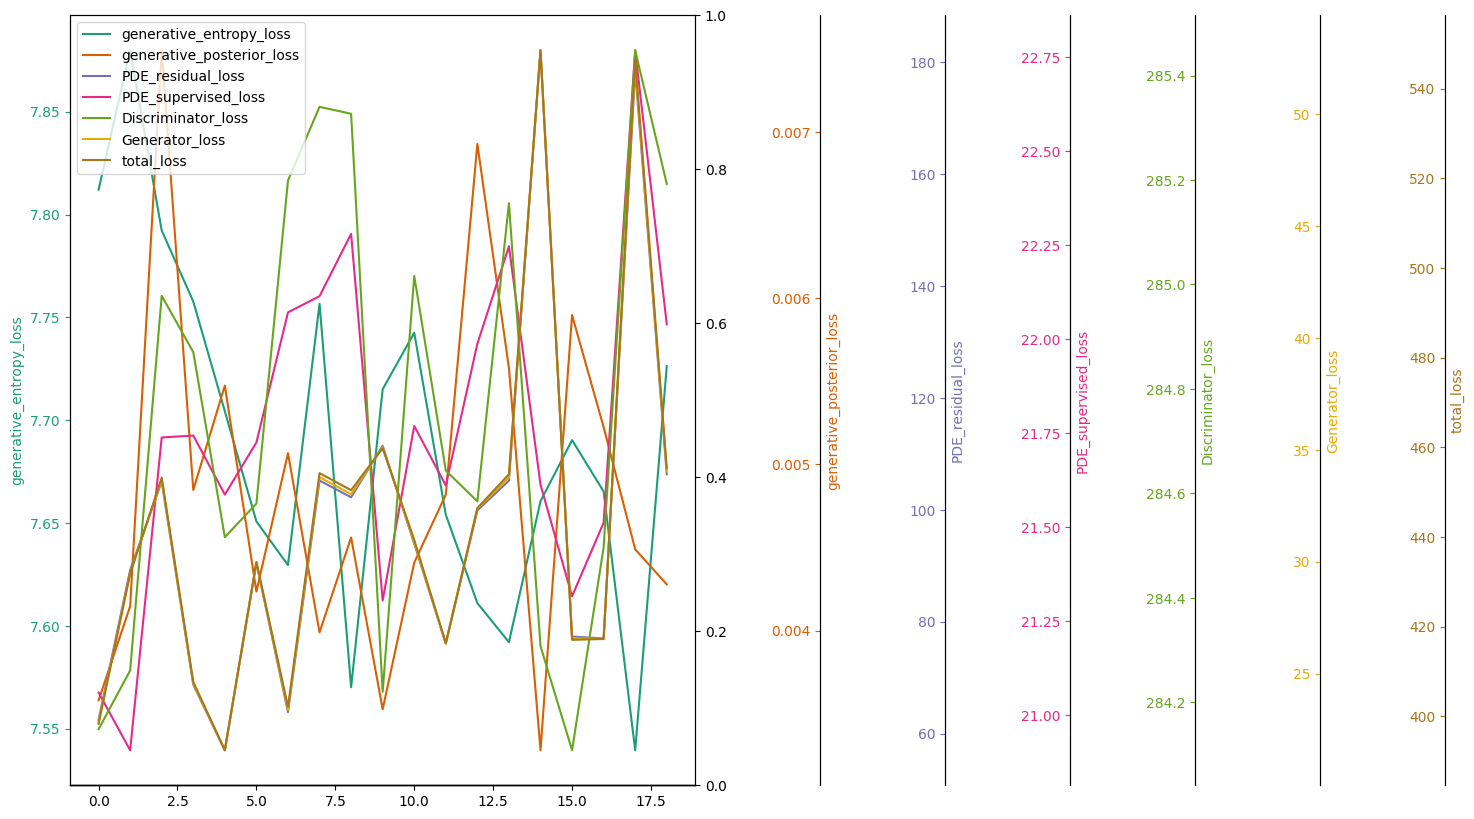

In [22]:

#plt.plot(step_loss["PDE_supervised_loss"][-100:])

inidx_1=-20
inidx_2=-1

step_loss={}
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

fig,axs=plt.subplots(figsize=(10,10))
fig.subplots_adjust(right=0.75)
t_lines=[]
axss=[axs]
colors = mpl.colormaps['Dark2'].colors

for i,(k,color) in enumerate(zip(step_loss.keys(),colors)):
    
    if i>0:
        axs.spines.left.set_position(("axes",1.0 + i*0.2))
        axs.spines.right.set_position(("axes",1.0 + i*0.2))
        axs.spines.top.set_position(("axes",1.0 + i*0.2))
    line=axs.plot(np.arange(len(step_loss[k][inidx_1:inidx_2])),step_loss[k][inidx_1:inidx_2],color=color,label=k)
    t_lines.append(line)
    axs=axs.twinx()
    axss.append(axs)
    

for line,axs,label,color in zip(t_lines,axss,step_loss.keys(),colors):
    axs.yaxis.label.set_color(color)
    axs.set(ylabel=label)
    axs.tick_params(axis='y', colors=color)
    

t_lines=reduce(lambda x,y:x+y,t_lines)
axs.legend(t_lines,[l.get_label() for l in t_lines])

plt.show()


step_loss={}
for k in hist[1]["test"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["test"]["generative_losses"])) for ep in hist.keys()
    )

fig,axs=plt.subplots(figsize=(10,10))
fig.subplots_adjust(right=0.75)
t_lines=[]
axss=[axs]
colors = mpl.colormaps['Dark2'].colors

for i,(k,color) in enumerate(zip(step_loss.keys(),colors)):
    
    if i>0:
        axs.spines.left.set_position(("axes",1.0 + i*0.2))
        axs.spines.right.set_position(("axes",1.0 + i*0.2))
        axs.spines.top.set_position(("axes",1.0 + i*0.2))
    line=axs.plot(np.arange(len(step_loss[k][inidx_1:inidx_2])),step_loss[k][inidx_1:inidx_2],color=color,label=k)
    t_lines.append(line)
    axs=axs.twinx()
    axss.append(axs)
    

for line,axs,label,color in zip(t_lines,axss,step_loss.keys(),colors):
    axs.yaxis.label.set_color(color)
    axs.set(ylabel=label)
    axs.tick_params(axis='y', colors=color)
    

t_lines=reduce(lambda x,y:x+y,t_lines)
axs.legend(t_lines,[l.get_label() for l in t_lines])

plt.show()

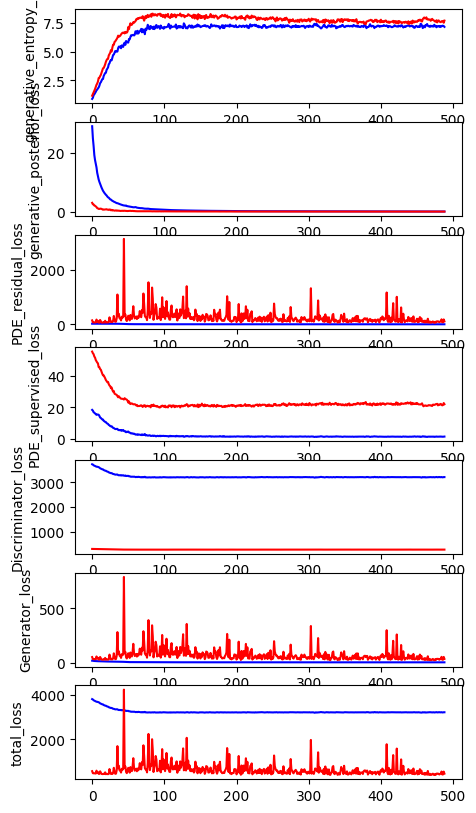

In [23]:
step_loss_train={}
step_loss_test={}
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss_train[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

for k in hist[1]["test"]["generative_losses"][0].keys():
    step_loss_test[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["test"]["generative_losses"])) for ep in hist.keys()
    )
    

inidx_1=10
inidx_2=-1
#fig,axs=plt.subplots(figsize=(5,5))
fig=plt.figure(figsize=(5,10))

t_lines=[]
axs=fig.subplots(len(step_loss.keys()),1)
for i,(ax,k) in enumerate(zip(axs,step_loss.keys())):
    line=ax.plot(np.arange(len(step_loss_train[k][inidx_1:inidx_2])),step_loss_train[k][inidx_1:inidx_2],color='b',label=k)
    line=ax.plot(np.arange(len(step_loss_test[k][inidx_1:inidx_2])),step_loss_test[k][inidx_1:inidx_2],color='r',label=k)
    ax.set(ylabel=k)
    t_lines.append(line)
    axss.append(axs)

plt.show()

In [542]:
list(step_loss.keys())

['generative_entropy_loss',
 'generative_posterior_loss',
 'PDE_residual_loss',
 'PDE_supervised_loss',
 'Discriminator_loss',
 'Generator_loss',
 'total_loss']

# Data sensibility test

In [13]:
root="../Exps/Data_sensibility_exps/GAN_PI"
#model_id="GAN_PI_LL_s10_PDELL"
model_id="GAN_PI_PointNet_LL_PDELL_D1_G1"
model_id="GAN_PI_PointNet_LL_r10_PDELL"
model_id="GAN_PI__MultiP20_PointNet_LL_PDELL"
#model_id="GAN_PI_PointNet_LL_PDELL_G_PointN_D_MLP"

In [14]:
os.listdir(os.path.join(root,model_id))

['10_loss_results.npy',
 '25_loss_results.npy',
 '50_loss_results.npy',
 '5_loss_results.npy',
 '70_loss_results.npy',
 '80_loss_results.npy',
 '95_loss_results.npy',
 'best.pt',
 'config.json',
 'initial_state.pt']

In [15]:
#root="../Exps/Data_sensibility_exps/GAN_PI"

#model_id="GAN_PI_LL_s10_PDELL"

print(os.listdir(os.path.join(root,model_id)))

hist=np.load(os.path.join(root,model_id,"70_loss_results.npy"),allow_pickle=True)
hist=hist.tolist()

['10_loss_results.npy', '25_loss_results.npy', '50_loss_results.npy', '5_loss_results.npy', '70_loss_results.npy', '80_loss_results.npy', '95_loss_results.npy', 'best.pt', 'config.json', 'initial_state.pt']


In [16]:
import glob
glob.glob((os.path.join(root,model_id,"*_loss_results.npy")))

['../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/10_loss_results.npy',
 '../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/25_loss_results.npy',
 '../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/50_loss_results.npy',
 '../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/5_loss_results.npy',
 '../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/70_loss_results.npy',
 '../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/80_loss_results.npy',
 '../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/95_loss_results.npy']

../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/25_loss_results.npy
7.731187
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/50_loss_results.npy
11.971437
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/5_loss_results.npy
5.4678226
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/70_loss_results.npy
15.351402
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/80_loss_results.npy
5.8642983
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/95_loss_results.npy
0.25130683


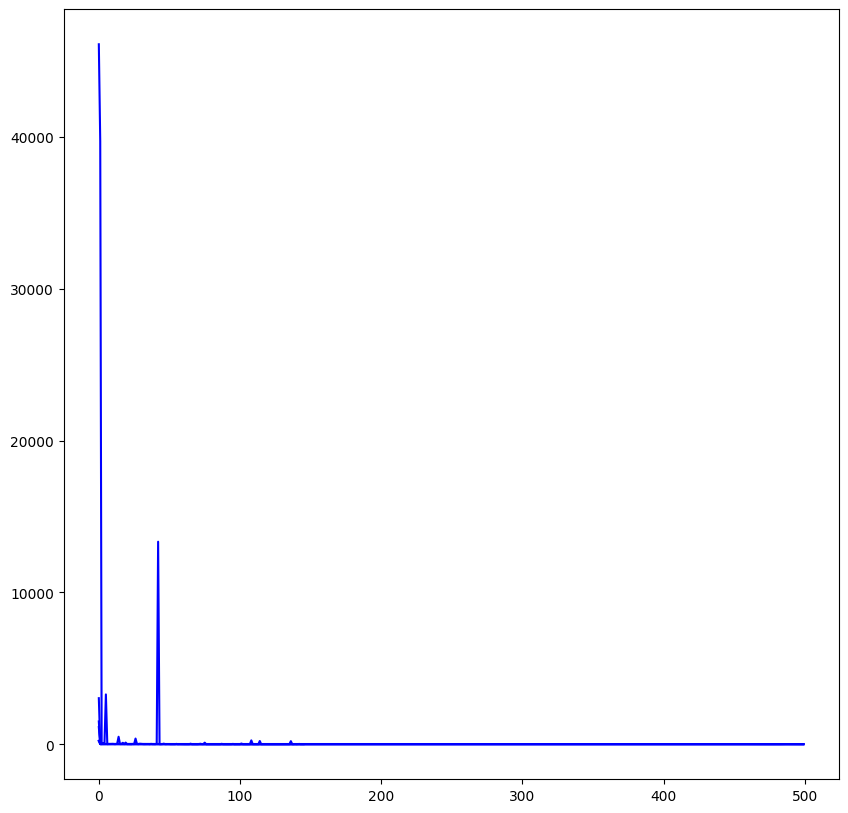

In [17]:
fig,axs=plt.subplots(figsize=(10,10))
inidx_1=0
inidx_2=-1
color='b'
for res in glob.glob((os.path.join(root,model_id,"*_loss_results.npy")))[1:]:
    print(res)
    step_loss={}
    hist=np.load(res,allow_pickle=True)
    hist=hist.tolist()
    for k in hist[0]["train"]["generative_losses"][0].keys():
        step_loss[k]=list(
            reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
        )
    axs.plot(np.arange(len(step_loss['PDE_residual_loss'][inidx_1:])),step_loss['PDE_residual_loss'][inidx_1:],color=color,label=k)
    print(np.min(step_loss['PDE_residual_loss'][inidx_1:]))
plt.show()



../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/10_loss_results.npy
24.97796
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/25_loss_results.npy
27.9954
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/50_loss_results.npy
34.00424
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/5_loss_results.npy
24.065067
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/70_loss_results.npy
40.301075
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/80_loss_results.npy
41.0738
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/95_loss_results.npy
57.005398


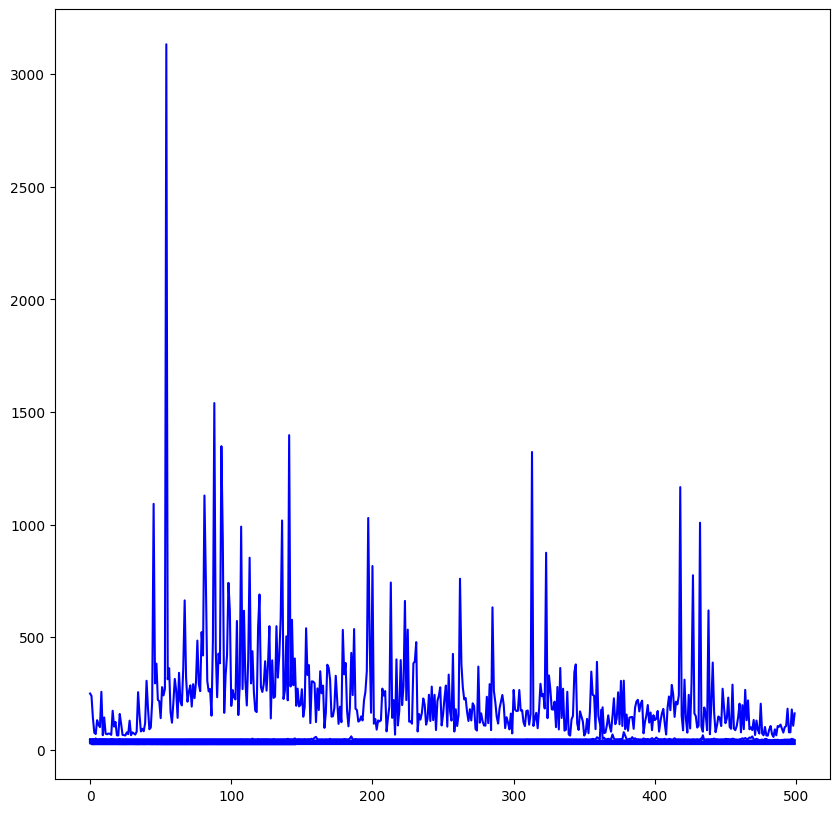

In [19]:
fig,axs=plt.subplots(figsize=(10,10))
inidx_1=700
inidx_2=-1
color='b'
for res in glob.glob((os.path.join(root,model_id,"*_loss_results.npy")))[:]:
    print(res)
    step_loss={}
    hist=np.load(res,allow_pickle=True)
    hist=hist.tolist()
    for k in hist[0]["test"]["generative_losses"][0].keys():
        step_loss[k]=list(
            reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["test"]["generative_losses"])) for ep in hist.keys()
        )
    axs.plot(np.arange(len(step_loss['PDE_residual_loss'][:])),step_loss['PDE_residual_loss'][:],color=color,label=k)
    print(np.min(step_loss['PDE_residual_loss'][:]))
plt.show()

In [31]:
np.load(os.path.join(root,model_id,"70_loss_results.npy"),allow_pickle=True).tolist()[0]

{'test': {'discriminative_losses': [{'generative_entropy_loss': tensor(-0.1200),
    'generative_posterior_loss': tensor(0.0660),
    'PDE_residual_loss': tensor(2.0963),
    'PDE_supervised_loss': tensor(2.1354),
    'Discriminator_loss': tensor(586.6686),
    'Generator_loss': tensor(1.0444),
    'total_loss': tensor(591.8907)},
   {'generative_entropy_loss': tensor(-0.1183),
    'generative_posterior_loss': tensor(0.0655),
    'PDE_residual_loss': tensor(1.9497),
    'PDE_supervised_loss': tensor(2.1352),
    'Discriminator_loss': tensor(586.9296),
    'Generator_loss': tensor(1.0080),
    'total_loss': tensor(591.9698)},
   {'generative_entropy_loss': tensor(-0.1079),
    'generative_posterior_loss': tensor(0.0777),
    'PDE_residual_loss': tensor(1.9755),
    'PDE_supervised_loss': tensor(2.1249),
    'Discriminator_loss': tensor(585.3234),
    'Generator_loss': tensor(1.0176),
    'total_loss': tensor(590.4112)},
   {'generative_entropy_loss': tensor(-0.1133),
    'generative_pos

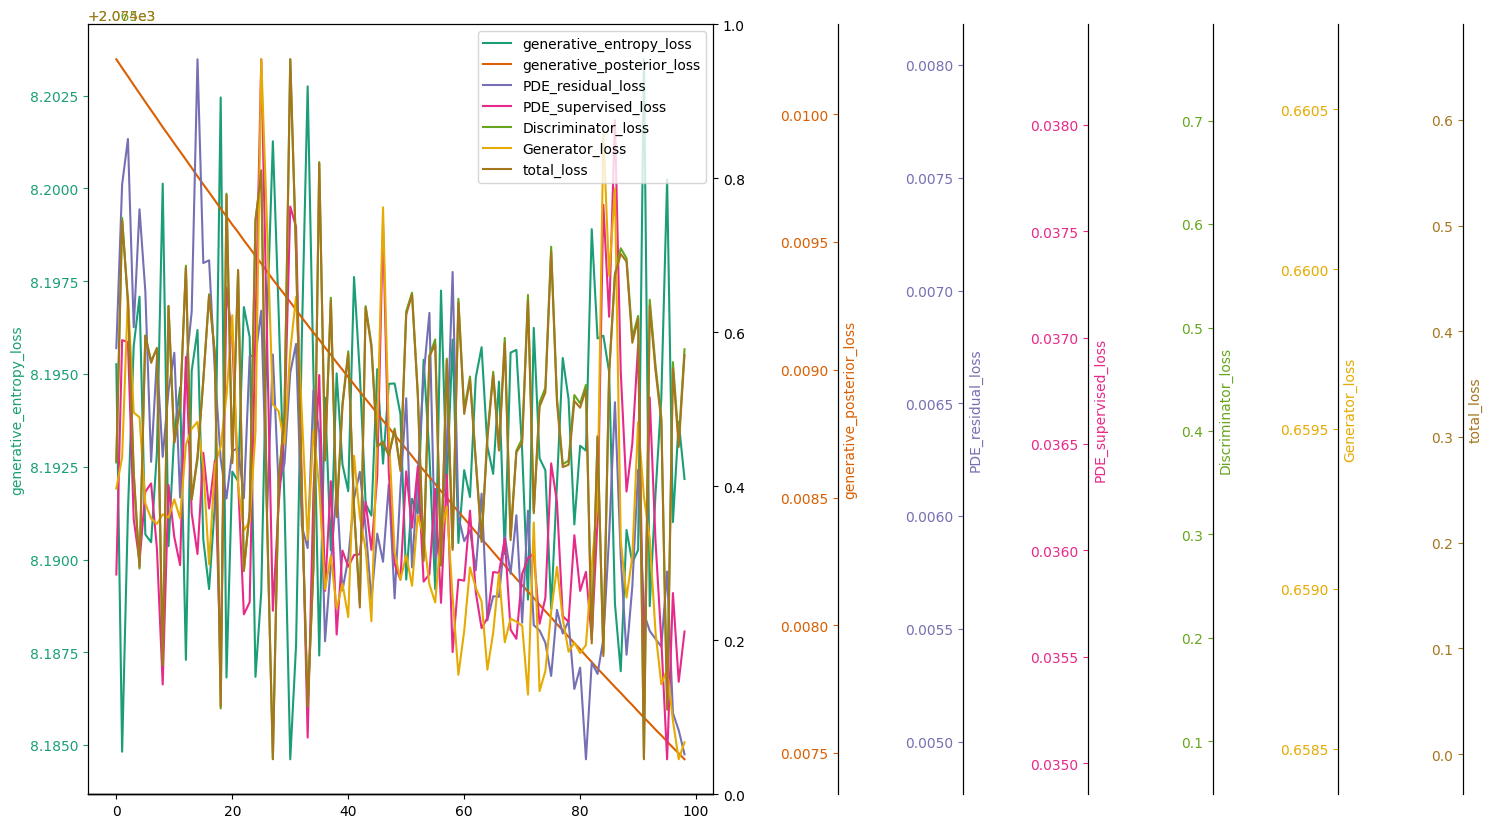

In [497]:
#plt.plot(step_loss["PDE_supervised_loss"][-100:])

step_loss={}
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

inidx_1=700
inidx_2=-1
fig,axs=plt.subplots(figsize=(10,10))
fig.subplots_adjust(right=0.75)
t_lines=[]
axss=[axs]
for i,(k,color) in enumerate(zip(step_loss.keys(),colors)):
    
    if i>0:
        axs.spines.left.set_position(("axes",1.0 + i*0.2))
        axs.spines.right.set_position(("axes",1.0 + i*0.2))
        axs.spines.top.set_position(("axes",1.0 + i*0.2))
    line=axs.plot(np.arange(len(step_loss[k][inidx_1:inidx_2])),step_loss[k][inidx_1:inidx_2],color=color,label=k)
    t_lines.append(line)
    axs=axs.twinx()
    axss.append(axs)
    

for line,axs,label,color in zip(t_lines,axss,step_loss.keys(),colors):
    axs.yaxis.label.set_color(color)
    axs.set(ylabel=label)
    axs.tick_params(axis='y', colors=color)
    

t_lines=reduce(lambda x,y:x+y,t_lines)
axs.legend(t_lines,[l.get_label() for l in t_lines])

plt.show()